##Working with Numpy - Part 1
The "data" in Data Analysis usually refers to numerical data e.g. sales figures, stock prices, database tables etc. The Numpy library provides specialized data structures, functions and other tools for numerical computing in Python.


Let's say we want to use climate data like teh temperature, rainfall and humidty in a region to determine if the region is well suited for growing apples. A really simple approach for doing this would be to formulate teh relationship between the annual yield of apples(tons per hectare) and the climate conditions like the average temperature (in degrees Farenheit), rainfall (in millimeters)  and average relative humidity (in percentage) as a linear equation.

`yield_of_apples = weight1 × temperature+ weight2 × rainfall + weight3 × humidity`

The yield of apples is expressed as a weighted sum of temperature, rainfall and humidity. Obviously, this is an approximation, since the actual relation may not necessarily be linear.

Based on some statistical analysis of historical data, we might be able to come up with reasonble values for the weights.

In [11]:
w1, w2, w3 = 0.3, 0.2, 0.5

Given some climate data for the region, we can now predict what the yield of apples in the region might look like. Here's some sample data:

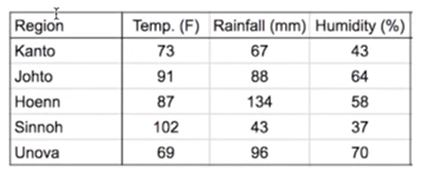

We can record the climate data in individual variables to record each region.

In [2]:
kanto_temp = 73
kanto_rainfall = 67
kanto_humidity = 43

Next, we can substitute it into the linear equation to predict yield of apples in that region.

In [3]:
kanto_yield_apples = kanto_temp * w1 + kanto_rainfall * w2 + kanto_humidity * w3
kanto_yield_apples

56.8

In [4]:
print(f"The expected yield of apples in the Kanto region is {kanto_yield_apples} tons per hectare.")

The expected yield of apples in the Kanto region is 56.8 tons per hectare.


To make if slightly easier to perform the above computation for multiple regions, we can represent the climate data for each region as a vector i.e. a list of numbers.

In [12]:
kanto = [73, 67, 43]
johto = [91, 88, 43]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

The thre numbers in each vector represent the temperature, rainfall and humidity data respectively. The set of weights to be used in the formula can also be represented as a vector.

In [13]:
weights = [w1, w2, w3]

Now we can write a function to calculate the yield of apples.

In [14]:
def crop_yield(region, weights):
  result = 0
  for x, w in zip(region, weights):
    result += x * w
  return result

In [15]:
crop_yield(kanto, weights)

56.8

In [16]:
crop_yield(johto, weights)

66.4

In [17]:
crop_yield(unova, weights)

74.9

## Going from Python lists to Numpy arrays
The calculation performed by the crop_yield function (element-wise multiplication of two vectors, and taking a sum of the results) is also the dot product of the two vectors. [link text](https://www.youtube.com/watch?v=WNuIhXo39_k )

Numpy provides a built-in function to perform the dot product of two vectors. However, the lists must first be converted to numpy arrays before the operation.

To install numpy:
!pip install numpy

In [18]:
import numpy as np

In [19]:
kanto = np.array([73, 67, 43])

In [20]:
kanto

array([73, 67, 43])

In [21]:
weights = np.array([w1, w2, w3])

In [22]:
weights

array([0.3, 0.2, 0.5])

In [23]:
type(kanto)

numpy.ndarray

In [24]:
type(weights)

numpy.ndarray

Just like lists, Numpy arrays support the indexing notation []

In [25]:
weights[0]

0.3

In [26]:
kanto[2]

43

# Operating on Numpy arrays

We can now compute the dot product of the two vectors using the np.dot function

`help(np.dot)` provides further information

In [27]:
np.dot(kanto, weights)

56.8

The same result can be achieved with simpler operations in Numpy.

In [28]:
(kanto * weights).sum()

56.8

`*` performs an element-wise multiplication of two arrays if they have the same size, and the sum method calculates the sum of numbers in an array.


There are several benefits to using Numpy arrays:


*   Better performance - The library uses C++ which is faster than Python.
*   Ease of use



In [29]:
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [30]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
  result += x1 * x2
result

CPU times: user 196 ms, sys: 296 µs, total: 196 ms
Wall time: 197 ms


833332333333500000

In [31]:
%%time
np.dot(arr1_np, arr2_np)

CPU times: user 2.96 ms, sys: 0 ns, total: 2.96 ms
Wall time: 2.97 ms


833332333333500000